# Homework: List of planets with mass and distance, Center of Mass for each system

# 1. Read and get the Center of Mass 
We need to estimate the CM for each planet, so:
\begin{equation*}
\text{CM} = \frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{\sum \limits_{k=1}^{n}m_{k}} %=\frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{M_{T}}
\end{equation*}
For do it, is nessesary get the values CM for each planet, so with the columns of `mass` and distance from the star  `semi_major_axis` we can get $\boxed{m_{k}\vec{r_{k}}}$ values.
List of planets from exoplanet.eu 

In [1]:
import pandas as pd 
import numpy as np

data_ep = pd.read_csv('data/exoplanet.eu_catalog.csv', 
                      usecols=['mass','mass_error_min','mass_error_max',
                               'semi_major_axis','semi_major_axis_error_min','semi_major_axis_error_max','star_name'])

class System:
    def __init__(self, data):
        self.data=data
        self.system = list(self.data.groupby("star_name").groups.keys())
        self.Number()
        self.Mass()
        self.CenterOfMass()
        #self.Error_CM()
        
    def Number(self):
        sys = self.data.groupby("star_name")
        self.N_total = len(sys["mass"])
        
    def Mass(self):
        sys = self.data.groupby("star_name")
        self.M_total = sys["mass"].sum()
    
    def CenterOfMass(self):
        self.rm_i = self.data["mass"].multiply(self.data["semi_major_axis"])
        self.data_i = self.data.assign(CM_i = self.rm_i.values) 
        p_system = self.data_i.groupby("star_name")
        sum_rm = p_system['CM_i'].sum()#.tolist()
        self.CM = sum_rm.divide(self.M_total)   
    
    def Error_CM(self):
        Sm2 = (self.data["mass_error_min"].multiply(self.data["mass_error_min"]))
        Sr2 = (self.data["semi_major_axis_error_min"].multiply(self.data["semi_major_axis_error_min"]))
        self.E_rm_i=np.sqrt(Sm2.divide(Sr2)+Sm2.divide(Sr2))

In [2]:
data_ep.index[1]==True

True

In [3]:
data = data_ep[pd.notnull(data_ep["mass"])]
data = data[pd.notnull(data["semi_major_axis"])]
data1 = data[['star_name','mass','semi_major_axis']]

Data1=System(data1)
#Data1.M_total
#Data1 = pd.DataFrame({'system_name':Data1.system,'total_mass':Data1.M_total.tolist(),'center_of_Mass':Data1.CM.tolist()})
#data1
#problema que guarda total mass en la funcion 

## 1. Read and get the Center of Mass 
We need to estimate the CM for each planet, so:
\begin{equation*}
\text{CM} = \frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{\sum \limits_{k=1}^{n}m_{k}} %=\frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{M_{T}}
\end{equation*}
For do it, is nessesary get the values CM for each planet, so with the columns of `mass` and distance from the star  `semi_major_axis` we can get $\boxed{m_{k}\vec{r_{k}}}$ values.
List of planets from exoplanet.eu 

**Remember**: `pd.notnull("name_of_column")` deletes the NaN values in the column. 

**Remember**: `data=data[['column_a','column_b',..,'column_n',]]` to get a new order in the DataFrame

### data1:
Now is necessary processing the data with the prurpose to obtain the Center of Mass CM, `data1` is a DataFrame without the NaN values of _mass_ and _semi major axis_. Finally, we get 1523 rows.

**Remember:** The `data.groupby("key")` split the data in groups which are the key.

**Remember:** The `data[i].multiply(data[j])` multiplies the comun i and j of DataFrame or Series i and j, row by row.

**Remember:** The `data.groupby.groups.keys()` get the keys of the split data.

However, the calculus of the CM, counting the planetary systems with the same satar. 


### data2:
So, `data2` is a DataFrame without the NaN values of mass, semi major axis and their uncertainties. Finally, we get 1220 rows, 303 rows less than `data1`. 

In [4]:
data2 = data_ep.dropna()
data2 = data2[['star_name',"mass","mass_error_min",
               "semi_major_axis", "semi_major_axis_error_min", "semi_major_axis_error_max","mass_error_max"]]
Data2=System(data2)
#CM_2=CenterOfMass(Data2).M_total()
#system_2 = list(data2.groupby("star_name").groups.keys())
#system
#data2 = pd.DataFrame({'system_name':system_2,'total_mass':M_total.tolist(),'center_of_Mass':CM_2.tolist()})
#data1

In [7]:
data2

,star_name,mass,mass_error_min,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,mass_error_max
0,11 Com,19.40000,1.50000,1.29000,0.05000,0.05000,1.500000
1,11 Oph,21.00000,3.00000,243.00000,55.00000,55.00000,3.000000
2,11 UMi,10.50000,2.47000,1.54000,0.07000,0.07000,2.470000
4,14 Her,4.64000,0.19000,2.77000,0.05000,0.05000,0.190000
5,16 Cyg B,1.68000,0.07000,1.68000,0.03000,0.03000,0.070000
7,1RXS1609,14.00000,3.00000,330.00000,0.00000,0.00000,2.000000
8,1SWASP J1407,20.00000,6.00000,3.90000,1.70000,1.70000,6.000000
9,24 Boo,0.91000,0.10000,0.19000,0.00900,0.01200,0.130000
10,24 Sex,1.99000,0.38000,1.33300,0.00900,0.00400,0.260000
11,24 Sex,0.86000,0.22000,2.08000,0.02000,0.05000,0.350000


In [8]:
filter=(data2.mass_error_max==data2.mass_error_min)&(data2.semi_major_axis_error_min==data2.semi_major_axis_error_max)
data3=data2[filter]

In [26]:
number=(data3["star_name"].value_counts()).to_frame()
#number

In [10]:
nlist=number.index[number.star_name>2]

In [27]:
nlist

'HD 219134'

In [18]:
for i in range(len(nlist)):
    data4=data3[data3.star_name==nlist[i]]
    draws=[]
    for i in range(1000):
        masses=np.random.normal(data4.mass,data4.mass_error_min)
        axes=np.random.normal(data4.semi_major_axis,data4.semi_major_axis_error_min)
        draws+=[(masses*axes).sum()/masses.sum()]
    mtot=(data4.mass).sum()
    com=(data4.mass*data4.semi_major_axis).sum()/mtot
    dcmdmi=(data4.semi_major_axis-com)/mtot
    dcmdri=data4.mass/mtot
    erd=np.std(draws)
    erp=np.sqrt((dcmdmi**2*data4.mass_error_min**2+dcmdri**2*data4.semi_major_axis_error_min**2).sum())
    print(erd,erp)
type(data4)    

0.14182707746419176 0.12802635696318093
0.03447125804918312 0.03312978536632616
0.44268578524577806 0.4355495337742577
0.0036695947947792728 0.00376530450522085
0.29510577576470925 0.28881243108059423
0.008713870520511632 0.005007556796188476
0.02453807536104832 0.023513371507133198
0.00727191232267935 0.005492656400624608
0.003917984627144779 0.003856771022679804
0.0022254315677085914 0.002249860570812894
0.002185633402777145 0.0020704920745946106
0.009249867235325112 0.009147374508147153
0.025777082365419014 0.02524112661424386
0.03242892422033773 0.033040902628587825
0.035533529162203197 0.036368116089700364
0.0006498961219934758 0.0006363403471685884
0.1017490912433146 0.07178650890783794
0.0039973801890427615 0.0039201138432522886
0.09965267830680691 0.09869628140143373
0.0335086683779696 0.03429700845565973
0.010282616790722987 0.010367416661162558
0.035085928442482164 0.033955822700523455
0.03135415487523062 0.0306424308745175


pandas.core.frame.DataFrame

In [24]:
data4.mass

2328    0.023
2329    0.013
2330    0.415
Name: mass, dtype: float64

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data4=data3[data3.star_name==nlist[0]]
data4

,star_name,mass,mass_error_min,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,mass_error_max
696,HD 219134,0.012,0.001,0.038474,8.000000e-07,8.000000e-07,0.001
697,HD 219134,0.011,0.002,0.064816,4.000000e-06,4.000000e-06,0.002
698,HD 219134,0.067,0.004,0.235080,4.000000e-06,4.000000e-06,0.004
700,HD 219134,0.034,0.004,0.375300,4.000000e-04,4.000000e-04,0.004
701,HD 219134,0.280,0.056,3.064000,4.800000e-02,4.800000e-02,0.056


In [16]:
draws=[]
for i in range(1000):
    masses=np.random.normal(data4.mass,data4.mass_error_min)
    print(masses)
    #axes=np.random.normal(data4.semi_major_axis,data4.semi_major_axis_error_min)
    #draws+=[(masses*axes).sum()/masses.sum()]
#masses

[0.01049837 0.01322911 0.06743661 0.03267872 0.1693126 ]
[0.01097701 0.01022413 0.06475072 0.03786688 0.21245837]
[0.01101429 0.01370051 0.06345215 0.03311749 0.34254871]
[0.01195054 0.01210581 0.06530528 0.02228123 0.19975746]
[0.01389197 0.01341003 0.06533872 0.0347764  0.27946062]
[0.01069461 0.01204988 0.06512551 0.03394585 0.36650459]
[0.0124068  0.01036585 0.06735598 0.03360813 0.4128985 ]
[0.01139671 0.01524482 0.05920562 0.03352388 0.21952724]
[0.01164325 0.00950012 0.06193097 0.03960592 0.31276576]
[0.01118551 0.01075138 0.07122624 0.02881471 0.34462191]
[0.0109489  0.00982244 0.063838   0.04107526 0.27713621]
[0.01225785 0.01195105 0.07195274 0.03335026 0.28664516]
[0.01280106 0.01239531 0.06735786 0.03291677 0.33290078]
[0.01246011 0.01376828 0.06810122 0.03724637 0.26154475]
[0.01158106 0.01298383 0.06475367 0.03513263 0.31891372]
[0.01268682 0.01061523 0.06863844 0.03019128 0.37315652]
[0.01163954 0.01264856 0.06825435 0.0354511  0.23170321]
[0.01207452 0.01073948 0.066169

[0.0117991  0.0128995  0.06605414 0.03393479 0.3326928 ]
[0.0102469  0.01197214 0.06570879 0.03490666 0.22613886]
[0.0132214  0.0107958  0.06329414 0.03380672 0.17294828]
[0.01332376 0.01142382 0.06787891 0.03563917 0.20796778]
[0.01333727 0.01209903 0.06491733 0.03959535 0.19393525]
[0.01383173 0.01188271 0.05926701 0.03244187 0.3029115 ]
[0.01108717 0.00724277 0.06933609 0.04070071 0.28409141]
[0.0122218  0.0092697  0.07083421 0.03235912 0.28357784]
[0.01199496 0.01336195 0.06717838 0.02954048 0.26586799]
[0.01141849 0.0104542  0.06979679 0.03823356 0.22186693]
[0.01332737 0.0105234  0.060343   0.0301483  0.28358106]
[0.01316723 0.00801809 0.06837859 0.03650573 0.37164261]
[0.01165109 0.01280604 0.06831482 0.03864108 0.23335175]
[0.01240991 0.0087402  0.06681583 0.04196443 0.20607731]
[0.0111683  0.00776834 0.07190905 0.03601148 0.22924389]
[0.01294858 0.01162428 0.06502824 0.03353716 0.32105127]
[0.01132732 0.01010422 0.06842066 0.03689997 0.20639498]
[0.0108996  0.01336742 0.064285

[0.01270306 0.00834431 0.06704438 0.03278484 0.4602543 ]
[0.011273   0.00940831 0.06172448 0.03269236 0.16257331]
[0.01087022 0.01429498 0.07735256 0.03823559 0.25005186]
[0.01179374 0.01207896 0.06153061 0.03174766 0.28368332]
[0.01232008 0.0101337  0.07042724 0.03026237 0.28367198]
[0.01076639 0.01161529 0.06539113 0.02816539 0.20208148]
[0.01171073 0.01516615 0.07032831 0.03870984 0.29777721]
[0.01175121 0.0090543  0.05592806 0.03097413 0.30184569]
[0.01115474 0.00998955 0.07066829 0.0301152  0.35843183]
[0.01208282 0.01239036 0.07732817 0.03597663 0.28962377]
[0.01182865 0.00937451 0.07079021 0.0308828  0.21357947]
[0.01250969 0.00977146 0.0644288  0.04433275 0.25457323]
[0.01242234 0.01043329 0.06636265 0.03725874 0.31715395]
[0.01294694 0.0121865  0.06629728 0.02908078 0.2244646 ]
[0.01169356 0.01311637 0.07041728 0.03552519 0.32701483]
[0.01039209 0.01273388 0.06303881 0.02606816 0.2675791 ]
[0.01206938 0.01054366 0.06369361 0.03425922 0.29573163]
[0.01283964 0.01263869 0.074364

(array([  4.,   2.,   5.,  33., 102., 214., 288., 232., 100.,  20.]),
 array([0.15757775, 0.20626251, 0.25494726, 0.30363202, 0.35231678,
        0.40100154, 0.4496863 , 0.49837106, 0.54705582, 0.59574058,
        0.64442534]),
 <a list of 10 Patch objects>)

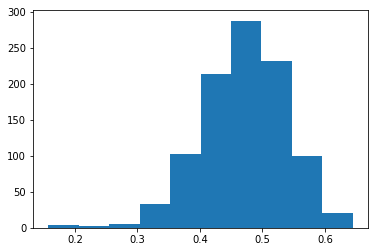

In [106]:
plt.hist(np.log10(draws))

(array([  5.,   6.,  55., 153., 240., 241., 178.,  90.,  25.,   7.]),
 array([1.43740035, 1.73464686, 2.03189337, 2.32913988, 2.62638639,
        2.9236329 , 3.22087942, 3.51812593, 3.81537244, 4.11261895,
        4.40986546]),
 <a list of 10 Patch objects>)

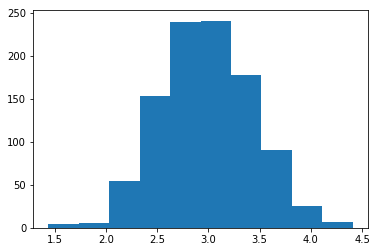

In [108]:
plt.hist(draws)

In [111]:
np.std(draws)

0.4490310721865742

In [112]:
data4

,star_name,mass,mass_error_min,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,mass_error_max
765,HD 34445,0.6290,0.0280,2.0750,0.0160,0.0160,0.0280
766,HD 34445,0.1680,0.0160,0.7181,0.0049,0.0049,0.0160
768,HD 34445,0.0529,0.0089,0.2687,0.0019,0.0019,0.0089
769,HD 34445,0.1190,0.0210,1.5430,0.0160,0.0160,0.0210
770,HD 34445,0.3800,0.1300,6.3600,1.0200,1.0200,0.1300


In [115]:
mtot=(data4.mass).sum()
com=(data4.mass*data4.semi_major_axis).sum()/mtot

In [116]:
dcmdmi=(data4.semi_major_axis-com)/mtot
dcmdri=data4.mass/mtot

In [120]:
np.sqrt((dcmdmi**2*data4.mass_error_min**2+dcmdri**2*data4.semi_major_axis_error_min**2).sum())

0.4355495337742577

In [88]:
print(M_total)

star_name
 OGLE-2016-BLG-1067L     0.43000
 TYC 4282-605-1         10.78000
11 Com                  19.40000
11 Oph                  21.00000
11 UMi                  10.50000
14 And                   5.33000
14 Her                   4.64000
16 Cyg B                 1.68000
18 Del                  10.30000
1RXS1609                14.00000
1SWASP J1407            20.00000
24 Boo                   0.91000
24 Sex                   2.85000
2M  1938+46              1.90000
2M 0103-55 (AB)         13.00000
2M 0122-24              20.00000
2M 0219-39              13.90000
2M 0441+23               7.50000
2M 0746+20              30.00000
2M 1207-39               4.00000
2M 2140+16              20.00000
2M 2206-20              30.00000
2M 2236+4751            12.50000
2MASS J1450-7841 A      40.00000
2MASS J1450-7841 B      40.00000
2MASS J2250+2325        30.00000
30 Ari B                 9.88000
38 Vir                   4.51000
4 Uma                    7.10000
42 Dra                   3.88000


#### For `data1`: #### 
The CM:

In [24]:
r_i = data1["semi_major_axis"]
m_i = data1["mass"]
#the multiplications between columns:
rm_i = r_i.multiply(m_i)
data1 = data1.assign(CM_i=rm_i.values) #New colimn in DataFrame with CM value, per each planet in the system. 
p_system = data1.groupby("star_name")
#p_system.count()

In [82]:
M_total = p_system["mass"].sum()#.tolist() changes from Series to list
sum_rm = p_system['CM_i'].sum()#.tolist()
CM = sum_rm.divide(M_total) #total center of mass, for each extraplanetary system

system = list(data.groupby("star_name").groups.keys())

print(len(p_system),len(CM),len(M_total))

data1 = pd.DataFrame({'system_name':system,'total_mass':M_total.tolist(),'center_of_Mass':CM.tolist()})
data1 #the data after get the Center of Mass for each system 

1292 1292 1292


,system_name,total_mass,center_of_Mass
0,OGLE-2016-BLG-1067L,0.43000,1.700000
1,TYC 4282-605-1,10.78000,0.422000
2,11 Com,19.40000,1.290000
3,11 Oph,21.00000,243.000000
4,11 UMi,10.50000,1.540000
5,14 And,5.33000,0.830000
6,14 Her,4.64000,2.770000
7,16 Cyg B,1.68000,1.680000
8,18 Del,10.30000,2.600000
9,1RXS1609,14.00000,330.000000


### 3. Gaussian Mixture Model


/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecatio

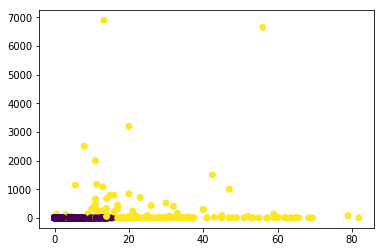

In [101]:
from sklearn.mixture import GMM
import matplotlib.pyplot as plt

gmm = GMM(2, covariance_type='full', random_state=0)
A=data1[["total_mass","center_of_Mass"]]
gmm.fit(A.values)
cluster_label = gmm.predict(A.values)
A.values[:, 0]
plt.scatter(A.values[:, 0], A.values[:, 1], c=cluster_label);